In [4]:
# 📘 Assessment: Timing Programs, Counting Operations, and Complexity Analysis
# MIT 6.100L (Inspired) – Introduction to Computer Science and Programming Using Python
# Eldo-Hub – Data Science Students

# 📂 Instructions
# Complete each question below inside this notebook.
# Use code cells for programming tasks.
# Use markdown cells for explanations.
# Submit your completed notebook as your assessment

# Part 1: Timing Programs (Lecture 21)
# Q1. Timing Functions
# Write two functions:

# A function that computes the sum of integers from 1 to n using a loop.
# A function that computes the sum of integers from 1 to n using the formula (n(n+1)/2).
# Use Python's time module to measure execution time for increasing values of n ([10**3, 10**5, 10**7]).

# Task: Compare the timing results and explain why they differ.

import time
#functoin 1: sum using a loop
def sum_loop(n):
    total = 0  # Initialize total
    for i in range(1, n+1):
        total += i # Correct the typo
    return total

# function :2 sum using formula
def sum_formula(n):
  return n * (n + 1) // 2

# test value
test_value = [10**3, 10**5, 10**7]

for n in test_value:
   # measure loop time
   start = time.time()
   result_loop = sum_loop(n)
   end = time.time()
   loop_time = end - start

   # measure formula time
   start = time.time()
   result_formula = sum_formula(n)
   end = time.time()
   formula_time = end - start

   print(f"n = {n}:")
   print(f" loop result = {result_loop},  time = {loop_time:.6f} seconds")
   print(f" formula result = {result_formula},  time = {formula_time:.6f} seconds")
   print("_"*50)

n = 1000:
 loop result = 500500,  time = 0.000050 seconds
 formula result = 500500,  time = 0.000002 seconds
__________________________________________________
n = 100000:
 loop result = 5000050000,  time = 0.005917 seconds
 formula result = 5000050000,  time = 0.000005 seconds
__________________________________________________
n = 10000000:
 loop result = 50000005000000,  time = 0.662752 seconds
 formula result = 50000005000000,  time = 0.000006 seconds
__________________________________________________


In [8]:
# Q2. Counting Operations
# Modify your loop-based sum function to count how many operations it performs for input size n.

# Task: Express its growth in terms of Big-O notation

def sum_and_count_ops(arr):
    ops = 0          # init ops

    totle = 0       # init tota
    ops += 1         # (1)

    i = 0            # init index
    ops += 1         # (2)

    n = len(arr)
    ops += 1         # (3) read length

    while True:
        ops += 1     # (4) loop test
        if i >= n:
            break

        x = arr[i]   # (5) read A[i]
        ops += 1

        totle = totle + x   # (6) addition
        ops += 1

        i += 1       # (7) increment i
        ops += 1

    return totle, ops

print("n=5:", sum_and_count_ops ([1,2,3,4,5]))
print("n=10:", sum_and_count_ops(list(range(1, 11))))
print("n=100:", sum_and_count_ops(list(range(1, 101))))

n=5: (15, 24)
n=10: (55, 44)
n=100: (5050, 404)


In [12]:
# Part 2: Complexity Analysis (Lecture 22)
# Q3. Linear vs Quadratic Growth
# Consider the following two functions:

# def linear_sum(L):
#     total = 0
#     for x in L:
#         total += x
#     return total

# def quadratic_pairs(L):
#     count = 0
#     for i in L:
#         for j in L:
#             count += i*j
#     return count
# Task:

# Count the number of operations for both functions.
# Determine their order of growth (Big-O and Big-Theta).
# Plot their runtime growth for increasing input sizes

def linear_sum(L):
  ops = 0
  total = 0
  ops += 1 # initialization
  for x in L:
    total += x
    ops += 1 # each addition
  ops += 1 # return
  print(f"linear_sum: {ops} operations for n={len(L)}")
  return total

def quadratic_pairs(L):
  ops = 0
  count = 0
  ops += 1 # initialization
  for i in L:
    for j in L:
      count += i * j
      ops += 2 # 1 multiplication + 1 addition
  ops += 1 # return
  print(f"quadractic_pairs: {ops} operations for n={len(L)}")
  return count

L = list(range(5))   # try n = 5
linear_sum(L)
quadratic_pairs(L)

L = list(range(10))  # try n = 10
linear_sum(L)
quadratic_pairs(L)

linear_sum: 7 operations for n=5
quadractic_pairs: 52 operations for n=5
linear_sum: 12 operations for n=10
quadractic_pairs: 202 operations for n=10


2025

In [17]:
# Q4. Searching Algorithms
# Implement linear search and binary search.
# Count the number of operations each requires for lists of
#  size [10**3, 10**4, 10**5, 10**6].
# Compare against Python's built-in in operator.
# Task: Plot how the number of operations grows with input size and
#  explain the difference between Θ(n) and Θ(log n).

import random
import bisect
import matplotlib.pyplot as plt

def linear_search(L, target):
    ops = 0
    for x in L:
        ops += 1
        if x == target:
            return True, ops
    return False, ops


def binary_search(L, target):
    ops = 0
    low, high = 0, len(L) - 1
    while low <= high:
        ops += 1
        mid = (low + high) // 2
        if L[mid] == target:
            return True, ops
        elif L[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return False, ops

def python_in(L, target):
    ops = 0
    for x in L:
        ops += 1
        if x == target:
            return True, ops
    return False, ops


sizes = [10**3, 10**4, 10**5, 10**6]
results = {"linear": [], "binary": [], "in": []} # Corrected ' binary' to 'binary'

for n in sizes:
  L = list(range(n))
  target = -1 # not in list

  _,ops_lin = linear_search(L, target)
  _,ops_bin = binary_search(L, target)
  _,ops_in  = python_in(L, target)

  results["linear"].append(ops_lin)
  results["binary"].append(ops_bin) # Corrected ' binary' to 'binary'
  results["in"].append(ops_in)

print(results)

{'linear': [1000, 10000, 100000, 1000000], 'binary': [9, 13, 16, 19], 'in': [1000, 10000, 100000, 1000000]}


n=10, operations=2000
n=100, operations=2000000
n=500, operations=250000000
n=1000, operations=2000000000


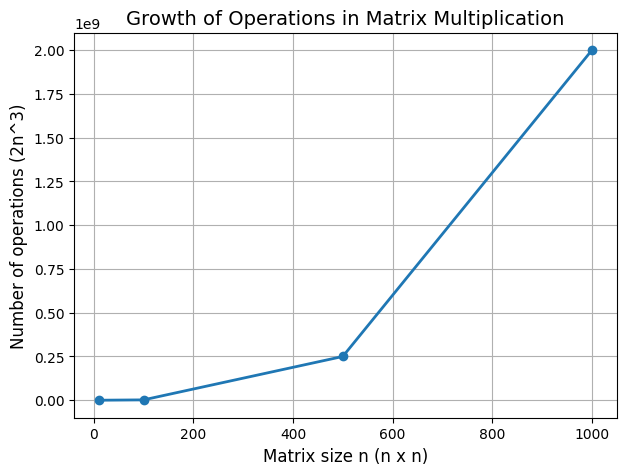

In [26]:
# Part 3: Applied Analysis
# Q5. Matrix Multiplication
# Write a function to multiply two n×n matrices.
# Count the number of operations.
# Express the complexity in Big-O and Big-Theta notation.
# Hint: Nested loops matter


import matplotlib.pyplot as plt

# Function to compute number of operations
def matrix_multiply_ops(n):
    return 2 * (n ** 3)

# Sizes to test
sizes = [10, 100, 500, 1000]
ops = [matrix_multiply_ops(n) for n in sizes]

# Print results
for n, op in zip(sizes, ops):
    print(f"n={n}, operations={op}")

# Draw graph
plt.figure(figsize=(7,5))
plt.plot(sizes, ops, marker='o', linewidth=2)
plt.xlabel("Matrix size n (n x n)", fontsize=12)
plt.ylabel("Number of operations (2n^3)", fontsize=12)
plt.title("Growth of Operations in Matrix Multiplication", fontsize=14)
plt.grid(True)
plt.show()


In [27]:
# Q6. Best, Worst, and Average Case
# Modify your linear search to count operations separately for:

# Best case (element is first)
# Worst case (element is last or missing)
# Average case (element is in the middle)
# Task: Report the operation counts and classify their Big-O/Theta behavior

def linear_search(L, target):
    operations = 0
    for i, val in enumerate(L):
        operations += 1  # comparison
        if val == target:
            return i, operations
    return -1, operations  # not found

# Test sizes
sizes = [10**3, 10**4, 10**5]

for n in sizes:
    L = list(range(n))

    # Best case: element is first
    _, best_ops = linear_search(L, L[0])

    # Average case: element in middle
    _, avg_ops = linear_search(L, L[n//2])

    # Worst case: element is last
    _, worst_ops = linear_search(L, L[-1])

    # Missing case: not in list
    _, missing_ops = linear_search(L, -1)

    print(f"n = {n:,}")
    print(f"  Best case ops     = {best_ops}")
    print(f"  Average case ops  = {avg_ops}")
    print(f"  Worst case ops    = {worst_ops}")
    print(f"  Missing case ops  = {missing_ops}\n")

n = 1,000
  Best case ops     = 1
  Average case ops  = 501
  Worst case ops    = 1000
  Missing case ops  = 1000

n = 10,000
  Best case ops     = 1
  Average case ops  = 5001
  Worst case ops    = 10000
  Missing case ops  = 10000

n = 100,000
  Best case ops     = 1
  Average case ops  = 50001
  Worst case ops    = 100000
  Missing case ops  = 100000

